In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
file_path = r"D:\桌面\Fall 2023\DV\HW\results TA.csv"
df = pd.read_csv(file_path, names=['Gender', 'Event M/W', 'Location', 'Year', 'Medal', 'Name', 'Nationality', 'Result', 'Event', 'Time_Cleaned', 'MixMatch'])

#### 1.  Which sports the performance has increased or decreased the most? In absolute or relative% terms

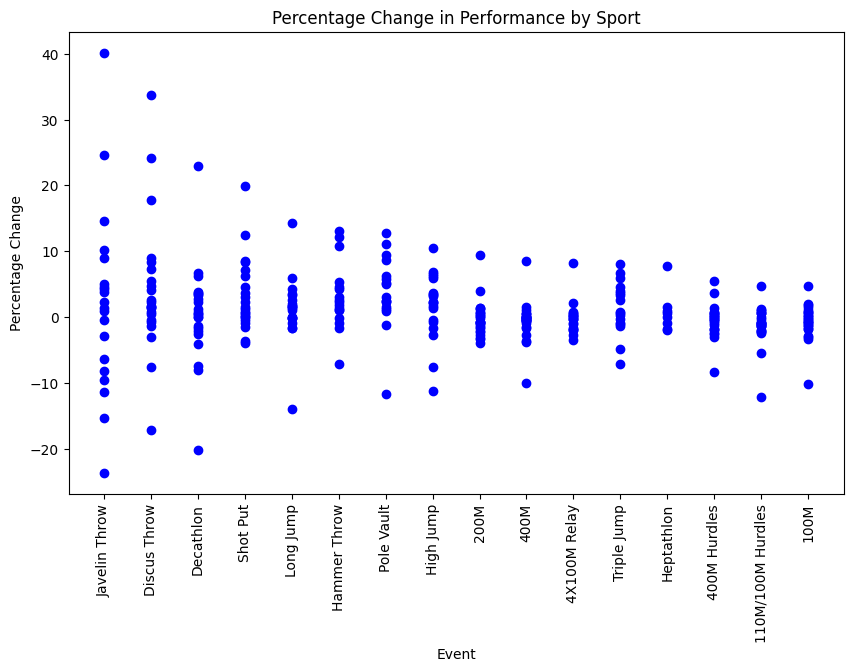

The sport with the maximum increase in performance is: Javelin Throw
The sport with the maximum decrease in performance is: Triple Jump


In [3]:
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')  # Convert 'Result' to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert 'Year' to numeric

avg_performance = df.groupby(['Event', 'Year'])['Result'].mean().reset_index()

# Calculate the percentage change in performance for each sport
avg_performance['PerformanceChange'] = avg_performance.groupby('Event')['Result'].pct_change() * 100

# Sort the dataframe based on 'PerformanceChange'
avg_performance = avg_performance.sort_values(by='PerformanceChange', ascending=False)

# Find the sport with the maximum and minimum percentage change
max_increase_sport = avg_performance.iloc[0]['Event']
max_decrease_sport = avg_performance.iloc[-1]['Event']

# Visual representation using dot plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_performance['Event'], avg_performance['PerformanceChange'], color='blue')
plt.title('Percentage Change in Performance by Sport')
plt.xlabel('Event')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.show()

print(f"The sport with the maximum increase in performance is: {max_increase_sport}")
print(f"The sport with the maximum decrease in performance is: {max_decrease_sport}")


#### 2. In which sports the difference between men and women is the least/most (in percentage terms).

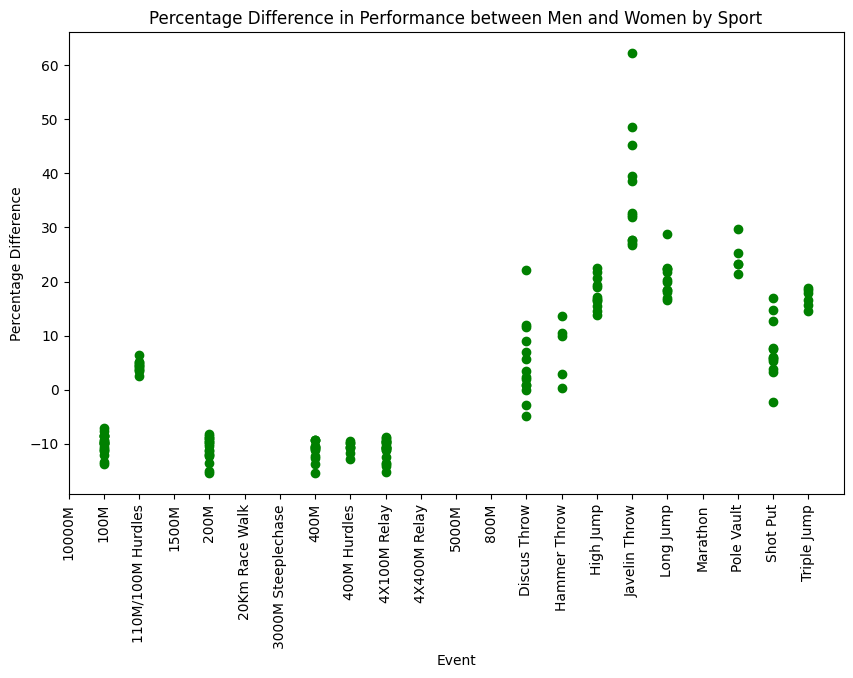

The sport with the least difference between men and women is: 400M
The sport with the most difference between men and women is: Javelin Throw


In [4]:
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')  # Convert 'Result' to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert 'Year' to numeric

# Split the data into separate groups for men and women
men_df = df[df['Gender'] == 'M']
women_df = df[df['Gender'] == 'W']


# Calculate the average performance for men and women for each sport
avg_performance_men = men_df.groupby(['Event', 'Year'])['Result'].mean().reset_index()
avg_performance_women = women_df.groupby(['Event', 'Year'])['Result'].mean().reset_index()

# Merge the two dataframes on 'Event' and 'Year'
merged_df = pd.merge(avg_performance_men, avg_performance_women, on=['Event', 'Year'], suffixes=('_Men', '_Women'))

# Calculate the percentage difference in performance between men and women
merged_df['PercentageDifference'] = ((merged_df['Result_Men'] - merged_df['Result_Women']) / merged_df['Result_Women']) * 100

# Find the sport with the least and most percentage difference
min_difference_sport = merged_df.loc[merged_df['PercentageDifference'].idxmin(), 'Event']
max_difference_sport = merged_df.loc[merged_df['PercentageDifference'].idxmax(), 'Event']

# Visualize the percentage difference using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Event'], merged_df['PercentageDifference'], color='green')
plt.title('Percentage Difference in Performance between Men and Women by Sport')
plt.xlabel('Event')
plt.ylabel('Percentage Difference')
plt.xticks(rotation=90)
plt.show()

print(f"The sport with the least difference between men and women is: {min_difference_sport}")
print(f"The sport with the most difference between men and women is: {max_difference_sport}")


#### 3. In which sports and years the difference between the gold and the silver is the greatest?

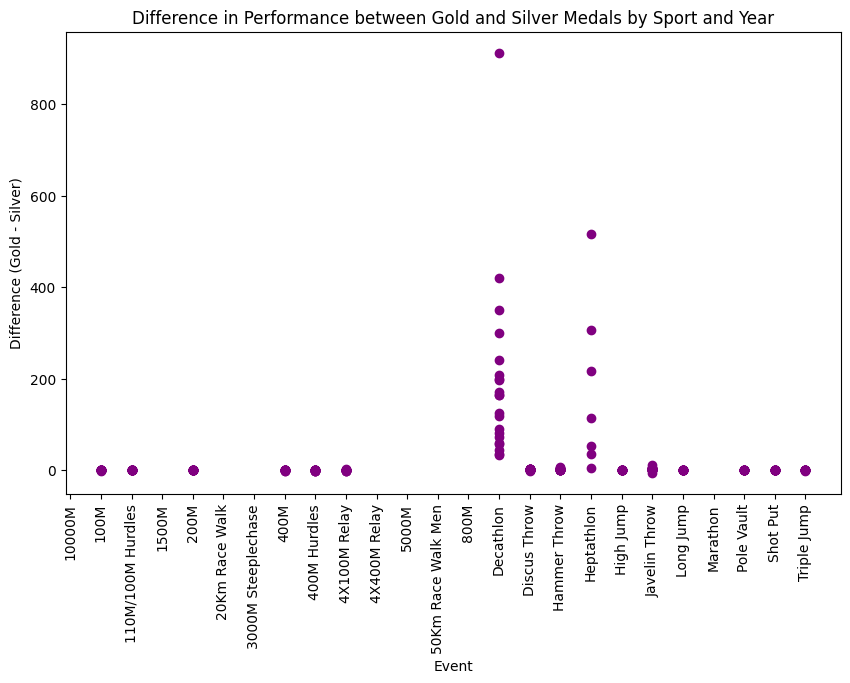

The sport and year with the greatest difference between Gold and Silver is:

Event: Decathlon
Year: 1952.0


In [5]:
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')  # Convert 'Result' to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert 'Year' to numeric

# Filter data for gold and silver medals separately
gold_df = df[df['Medal'] == 'G']
silver_df = df[df['Medal'] == 'S']

# Calculate the average performance for gold and silver for each sport and year
avg_performance_gold = gold_df.groupby(['Event', 'Year'])['Result'].mean().reset_index()
avg_performance_silver = silver_df.groupby(['Event', 'Year'])['Result'].mean().reset_index()

# Merge the two dataframes on 'Event' and 'Year'
merged_df = pd.merge(avg_performance_gold, avg_performance_silver, on=['Event', 'Year'], suffixes=('_Gold', '_Silver'))

# Calculate the difference between gold and silver performances
merged_df['Difference_Gold_Silver'] = merged_df['Result_Gold'] - merged_df['Result_Silver']

# Find the sport and year with the greatest difference
max_difference_row = merged_df.loc[merged_df['Difference_Gold_Silver'].idxmax()]


# Visualize the difference using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Event'], merged_df['Difference_Gold_Silver'], color='purple')
plt.title('Difference in Performance between Gold and Silver Medals by Sport and Year')
plt.xlabel('Event')
plt.ylabel('Difference (Gold - Silver)')
plt.xticks(rotation=90)
plt.show()

print(f"The sport and year with the greatest difference between Gold and Silver is:\n")
print(f"Event: {max_difference_row['Event']}\nYear: {max_difference_row['Year']}")